# Titanic Dataset

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import Data

In [2]:
df_titantic = pd.read_csv('data/Titanic-Dataset.csv', header = 0)
df_titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('Shape:', df_titantic.shape)
display(df_titantic.sample(5))
df_titantic.info()

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Exploratory EDA

In [4]:
missing = df_titantic.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df_titantic) * 100).round(1)
missing_table = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
missing_table[missing_table['missing_count'] > 0]

,missing_count,missing_pct
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [5]:
df_titantic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [6]:
survival_rate = df_titantic['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.38%


In [11]:
print(pd.crosstab(df_titantic['Sex'], df_titantic['Survived'], normalize='index').round(3))
' ---'
print(pd.crosstab(df_titantic['Pclass'], df_titantic['Survived'], normalize='index').round(3))
'---'
print(pd.crosstab([df_titantic['Sex'], df_titantic['Pclass']], df_titantic['Survived'], normalize='index').round(3))

Survived      0      1
Sex                   
female    0.258  0.742
male      0.811  0.189
Survived      0      1
Pclass                
1         0.370  0.630
2         0.527  0.473
3         0.758  0.242
Survived           0      1
Sex    Pclass              
female 1       0.032  0.968
       2       0.079  0.921
       3       0.500  0.500
male   1       0.631  0.369
       2       0.843  0.157
       3       0.865  0.135


## 4. Good Visuals

Text(0.5, 1.0, 'Titanic: Survival Counts')

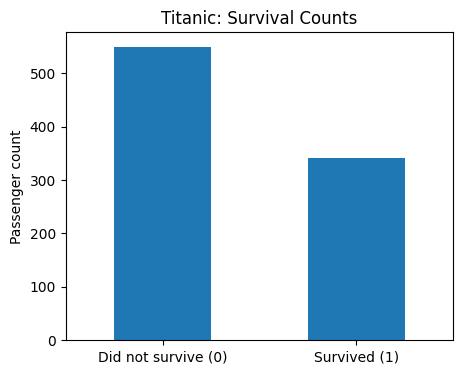

In [7]:
plt.figure(figsize=(5,4))
df_titantic['Survived'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1], ['Did not survive (0)', 'Survived (1)'], rotation=0)
plt.ylabel('Passenger count')
plt.title('Titanic: Survival Counts')

(0.0, 1.0)

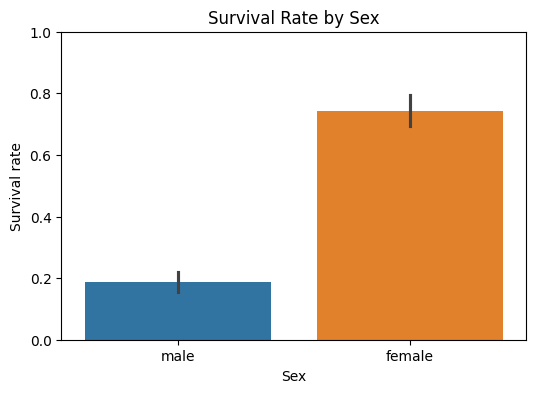

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_titantic, x='Sex', y='Survived',hue='Sex')
plt.ylabel('Survival rate')
plt.title('Survival Rate by Sex')
plt.ylim(0, 1)

Text(0, 0.5, 'Passenger count')

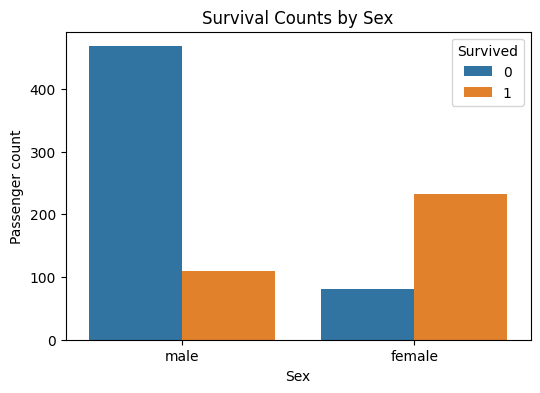

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_titantic, x='Sex', hue='Survived')
plt.title('Survival Counts by Sex')
plt.ylabel('Passenger count')

(0.0, 1.0)

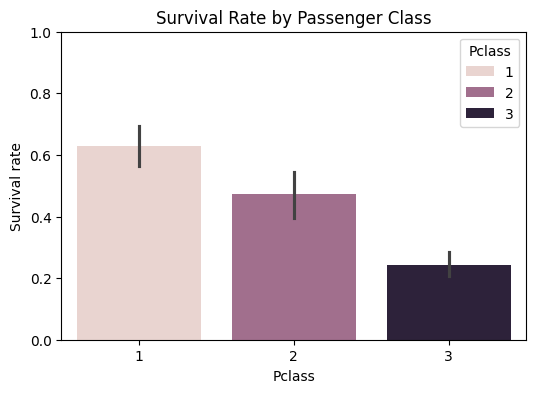

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_titantic, x='Pclass', y='Survived',hue='Pclass')
plt.ylabel('Survival rate')
plt.title('Survival Rate by Passenger Class')
plt.ylim(0, 1)

In [28]:
df_titantic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Age Distribution of Survived vs Not-Survived')

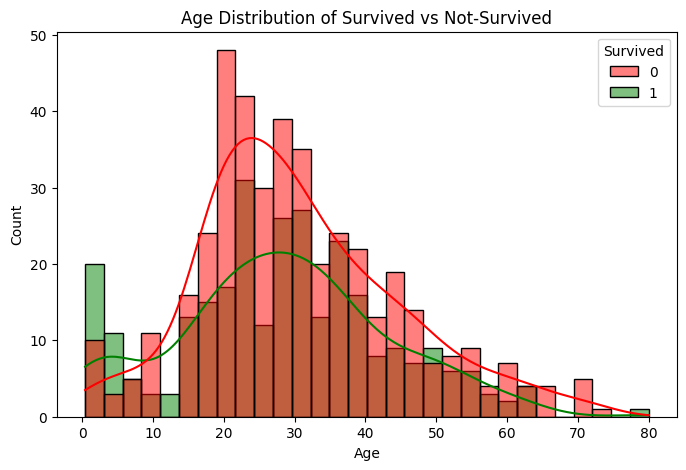

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_titantic, x='Age', hue='Survived', bins = 30, kde = True, palette={0:'red',1: 'green'}, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survived vs Not-Survived')

## 5. Misleading Visuals

(0.4, 0.8)

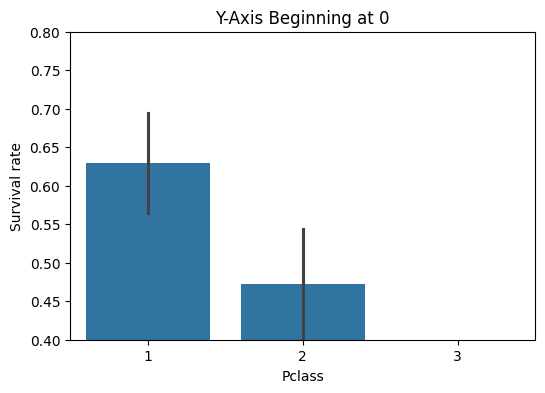

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_titantic, x='Pclass', y='Survived')
plt.title('Y-Axis Beginning at 0')
plt.ylabel('Survival rate')
plt.ylim(0.4, 0.8)

In [13]:
df_age = df_titantic.dropna(subset=['Age'])

In [14]:
ages = df_age['Age'].head(15)

Text(0.5, 1.0, 'Super Awesome Pie Chart that Shows Age')

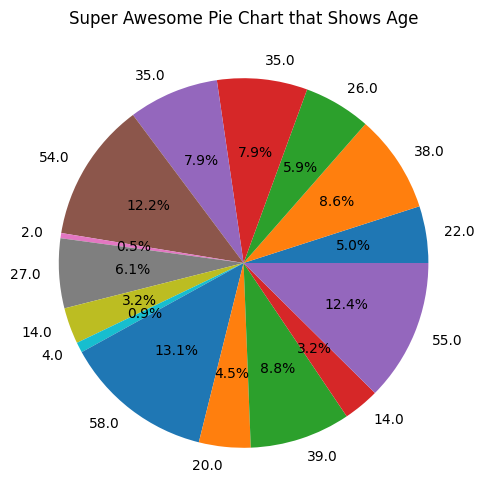

In [15]:
plt.figure(figsize=(6,6))
plt.pie(ages, labels=ages, autopct='%1.1f%%')
plt.title('Super Awesome Pie Chart that Shows Age')

In [16]:
df_titantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df_titantic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df_titantic['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [22]:
ids = df_titantic['PassengerId'].head(30)

Text(0.5, 1.0, 'Awful Pie Chart of Passenger Ids')

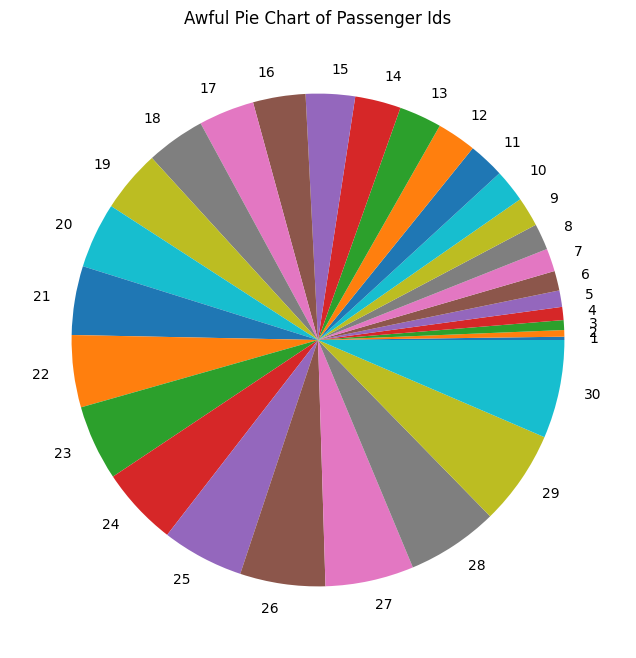

In [23]:
plt.figure(figsize=(8,8))
plt.pie(ids, labels=ids)
plt.title('Awful Pie Chart of Passenger Ids')